## Tutorial Notebook 1: Subset sampling

A tutorial showing how to perform $k$-subset sampling with the available solvers.

In [1]:
## Install the library
import sys
sys.path.append('./d2sample/')

In [2]:
from d2sample.subset.gumbel import k_gumbel_softmax, TopKGumbelSoftmax

In [3]:
import torch
import torch.nn.functional as F

In [4]:
# Generate some fake logits
logits = torch.randn((1, 15), requires_grad=True)

In [5]:
# Top-1 sampling is equivalent to classical Gumbel-Softmax
draws = torch.zeros((15,))
for i in range(1000):
  draws += k_gumbel_softmax(logits, k=1, hard=True)[0]

<BarContainer object of 15 artists>

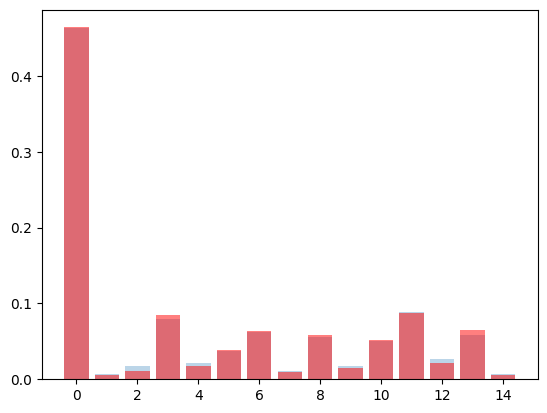

In [6]:
import matplotlib.pyplot as plt
plt.bar(range(15), F.softmax(logits, 1).detach()[0], alpha=0.3)
plt.bar(range(15), draws.detach() / 1000, color='r', alpha=0.5)

In [7]:
# Check a top-3 draw
k_gumbel_softmax(logits, k=3, hard=True)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]],
       grad_fn=<AddBackward0>)

In [8]:
# Everything is differentiable
k_gumbel_softmax(logits, k=1, hard=True).sum().backward()

In [9]:
# We also have a layered version
TopKGumbelSoftmax(k=2)(logits)

tensor([[1.3970e+00, 4.5510e-04, 5.3322e-03, 1.3356e-02, 2.0232e-02, 1.5392e-02,
         3.4891e-01, 2.1892e-03, 1.8268e-02, 7.3493e-04, 2.4469e-02, 1.2723e-01,
         5.8759e-03, 1.2764e-02, 7.7536e-03]], grad_fn=<AddBackward0>)

In [10]:
# Other methods have similar syntax
from d2sample.subset.imle import KIMLESampler

In [11]:
# Only have object-oriented version
KIMLESampler(k=3)(logits)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]],
       grad_fn=<WrappedFuncBackward>)

In [12]:
from d2sample.subset.simple import simple_sampler, SIMPLESampler

In [13]:
# Both functional and object-oriented variant
simple_sampler(logits, k=3)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]],
       grad_fn=<SIMPLEBackward>)

In [15]:
SIMPLESampler(3)(logits)

tensor([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],
       grad_fn=<SIMPLEBackward>)

In [16]:
SIMPLESampler(3)(logits).sum().backward()